# Aprendizaje Automático

## Práctica 3: Regresión lineal con múltiples variables

En esta práctica vamos a implementar la regresión lineal con múltiples variables desde cero, partiendo de la implementación que realizamos en la práctica anterior para una única variable. Extenderemos la implementación realizada para el modelo de aprendizaje y los algoritmos de aprendizaje de la solución directa y el descenso por gradiente.

### Índice de la práctica

- [Regresión lineal con varias variables](#parte1)
    - [Solución directa](#subparte1)
    - [Descenso por gradiente](#subparte2)
- [Scikit-learn](#parte2)
- [Visualización](#parte3)
- [Características polinomiales](#parte4)
- [Parte opcional](#parte5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Helper function to test the correctness of the solutions
def test_nb(var, val, msg=""):
    if var == val:
        print("✔️ Test passed.")
    else:
        print("❌ Test failed. " + msg)
        raise AssertionError(msg)


%matplotlib inline

### Regresión lineal con varias variables <a id="parte1"></a>

En esta práctica vamos a trabajar con dos variables de entrada, pero todo el código que desarrolles deberá funcionara para un número variable de entradas.

Vamos a comenzar leyendo los datos almacenados en el fichero `'house_prices2.txt'` mediante la función `loadtxt` de NumPy. Los datos contenidos en este fichero corresponden a un problema en el que se debe predecir el valor de una casa en base a su número de metros cuadrados y su número de habitaciones. En este fichero está almacenado el histórico de las casas valoradas hasta la actualidad. La primera columna corresponde al número de metros cuadrados, la segunda al número de habitaciones y la tercera a la valoración realizada.

In [2]:
# Usa la función loadtxt de numpy para cargar los datos en la variable data
data = np.loadtxt('house_prices2.txt', delimiter=',')
#(metros_cuadrados,numero_habitaciones,)
# <RELLENAR>

**Nota:** La instrucción test comprueba si el resultado que has obtenido es correcto. En caso de que no sea correcto te devolverá un mensaje de error.

In [3]:
test_nb(list(data[0, :].round(3)), [195.466, 3.0, 375906.0], 'data no está bien formada')

✔️ Test passed.


A continuación, debes crear la matriz de datos de entrada (`X`) y el vector columna con los datos de salida (`y`) para poder realizar el aprendizaje de los parámetros de la regresión lineal ($\theta$). Recuerda que la primera columna de los datos de entrada debe estar compuesta por unos, para poder trabajar mediante productos de matrices. Por tanto, la variable `X` estará compuesta por tres columnas: una de unos, una correspondiente a los metros cuadrados y otra al número de habitaciones. La variable `y` estará compuesta por las valoraciones de las diferentes viviendas (en formato columna). 

In [4]:
# Debes crear una columna de unos y concatenarla con la primera columna de data
# Utiliza la función hstack o column_stack para concatenar una matriz de m x 1 de ceros y 
# los datos en data menos su última columna

unos = np.ones([data.shape[0],1])
X = np.column_stack((unos,data[:,[0]],data[:,[1]]))
y = data[:,[2]]

# y debe ser un vector columna, es decir una matriz de m x 1.
# Para ello, debes tomar la segunda última de data y luego hacer un reshape(-1, 1). 
# El -1 le indica a numpy que debe estimar el tamaño automáticamente
# <RELLENAR>

print(X[:5, :], X.shape)
print(y[:5, :], y.shape)

[[  1.         195.46636938   3.        ]
 [  1.         148.6436269    3.        ]
 [  1.         222.96544036   3.        ]
 [  1.         131.54960981   2.        ]
 [  1.         278.70680045   4.        ]] (47, 3)
[[375906.]
 [310106.]
 [346860.]
 [218080.]
 [507506.]] (47, 1)


In [5]:
test_nb(list(X[0,:].round(2)), [1.0, 195.47, 3.0], 'X no está bien formada')
test_nb(list(y[:5, 0]), [375906.0, 310106.0, 346860.0, 218080.0, 507506.0], 'y no está bien formada')

✔️ Test passed.
✔️ Test passed.


Vamos a mostrar una gráfica de puntos para visualizar la distribución de las instancias del problema. De esta forma podemos comprobar si es posible que el modelo de regresión lineal se ajuste bien a los datos o no. Dado que tenemos dos variables de entrada y una de salida todavía somos capaces de dibujar los datos si usamos un scatter plot en 3D.

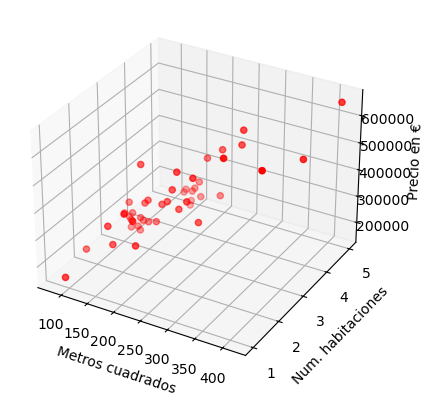

In [6]:
from cProfile import label


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1],X[:,2],y[:,0], color='red', label='Puntos iniciales')

# Utiliza el comando scatter para representar la nube de puntos que representa las instancias de nuestro problema
# ax.scatter(...)

ax.set_xlabel('Metros cuadrados')
ax.set_ylabel('Num. habitaciones')
ax.set_zlabel('Precio en €');

plt.show()

#### Solución directa <a id="subparte1"></a>

Como primera aproximación para la regresión vamos a implementar la solución analítica o directa. Recordemos que aprender el modelo se corresponde con enconrar el valor de los parámetros $\theta$. Para ello, y como ya tenemos los datos en la matriz $X$ con la primera columna siendo todo unos, podemos obtener los valores de los parámetros aplicando la solución directa.

$$\theta = (X^T X)^{-1}X^Ty,$$

donde $X$ es la matriz $m\times 3$ con una columna de unos e $y$ es un vector columna ($m \times 1$). 

Ten cuidado ya que $X$ es una matriz e $y$ es un vector (matriz de $n \times 1$). Por tanto, los productos que aparecen son entre matrices. Recuerda que en numpy el producto entre matrices se realiza mediante `np.dot()`.

A continuación, implementa la función `reg_directa` que reciba la matriz con los datos `X` (asumiendo que su primera columna tendrá unos) y devuelva los valores de los parámetros $\theta$ mediante la solución directa. **¿Qué cambios debes realizar con respecto a la práctica anterior?**

**Nota:** En Python puedes usar la función `np.linalg.pinv` para obtener la inversa de una matriz.

In [7]:
def reg_directa(X, y):
    # X ->(47,3), y -> (47,1) 
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y #-> (3,1)
    #No debes realizar cambios, lo unico que cambia es el tamaño de las matrices
    return theta

Utiliza ahora la función que acabas de implementar para obtener los valores de $\theta$ con los datos de nuestro problema.

In [8]:
# Obten los valores de theta
theta = reg_directa(X,y)
print(list(theta.ravel()))

[84222.03497046849, 1408.5558734181561, -8213.737965658696]


In [9]:
test_nb(list(np.round(theta, 4)), [84222.035, 1408.5559, -8213.738], 'Valor de theta incorrecto')

✔️ Test passed.


Ahora puedes dedicar un momento a analizar la importancia de cada una de las variables. 
* ¿Cuánto es el precio base de los pisos?
* ¿Cuánto supone cada metro cuadrado adicional?
* ¿Cómo influye el número de habitaciones en el precio? ¿Es lo que esperabas?

Responde aquí a las preguntas (doble click para editar):

* .84222$
* .1408$
* .por cada habitacion extra resta -8213$, no es lo esperado pero podria tener algo de sentido si tenemos en cuenta que una habitacion significa menos metros ^2

#### Descenso por gradiente <a id="subparte2"></a>

Recordemos que no siempre obtenemos una matriz invertible y en esos casos solo podemos usar el descenso por gradiente u otro algoritmo de optimización.

##### Normalización / Estandarización

Recuerda que en el caso de la regresión lineal multivariable, las diferentes variables pueden estar en diferentes rangos y esto dificulta el aprendizaje del modelo. Por ello, es necesario primero realizar la normalización (también denominada estandarización) de los atributos.

Para estandarizar los datos vamos a definir una función llamada `standard_scaler`. Esta función deberá realizar el siguiente proceso para cada variable (**no necesitas bucles para implementarla**):

* Calcular la media de los valores de la variable para todos los ejemplos (obtenemos un valor para cada variable).
* Calcular la desviación estándar de los valores de la variable para todos los ejemplos (obtenemos un valor para cada variable).
* A cada valor de la variable se le debe restar la media y el resultado dividirlo por la desviación estándar.
* Devolver los datos estandarizados, así como la media y la desviación estándar calculadas.


In [10]:
def standard_scaler(X):

    X_copy = np.copy(X)
    mean = np.mean(X_copy, axis= 0)
    std = np.std(X_copy, axis=0)
    X_copy = (X_copy - mean) / std

    return X_copy, mean, std

Ahora vamos a utilizar la función para estandarizar los datos de entrada. Debes utilizar la variable `X` creada anteriormete y crear una nueva matriz `X_norm` que almacene los datos estandarizados. **Recuerda que la columna de unos no debe normalizarse**. Además, debes guardar las medias y desviaciones típicas de los atributos de los datos de entrenamiento en las variables `medias` y `desviaciones`.

In [11]:
# Crea la matriz Xnorm y obtén los vectores medias y desviaciones
X_norm, mean, std = standard_scaler(X[:,1:])
X_norm = np.column_stack((unos, X_norm))
# Como la primera columna de X no se normaliza, puedes concatenarla después de normalizar el resto de columnas
# <RELLENAR>
print(X_norm[:10, :])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]
 [ 1.         -0.01994505  1.10220517]
 [ 1.         -0.59358852 -0.22609337]
 [ 1.         -0.72968575 -0.22609337]
 [ 1.         -0.78946678 -0.22609337]
 [ 1.         -0.64446599 -0.22609337]]


In [12]:
test_nb(list(np.mean(X_norm[:10,:], axis=0).round(4)), [1.0, -0.212, -0.0933], 'Normalización incorrecta')

✔️ Test passed.


##### Función de coste

Para continuar con la implementación del descenso por gradiente, vamos a implementar la función de coste.  Piensa qué modificaciones son necesarias en la implementación de la función de coste con respecto al caso de regresión lineal con una única variable.

Recuerda que la función de coste se define como: 

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^2$$


In [110]:
def compute_cost(X, y, theta):
    m = y.size
    
    h = X @ theta
    error = h - y
    J = (1/(2*m))*np.sum(error**2)

    return J

Ahora, para comprobar que la función está implementada correctamente, crea **un array columna** con valores 1, 2 y 3 para inicializar los parámetros $\theta$ de la regresión lineal. Luego, llama a la función `compute_cost` con los datos de entrada (`X`), de salida (`y`) y los parámetros del modelo (`theta`) y almacena el resultado en una variable con nombre `cost`. Imprime el resultado en pantalla.

In [77]:
# Crear los theta como una columna de ceros y calcula el coste asociado en la variable coste
theta = np.array([[1],[2],[3]])
cost = compute_cost(X_norm,y,theta)
print(cost)

57956018813.87728


In [78]:
test_nb(round(cost, 4), 57956018813.8773, 'Resultado incorrecto')

✔️ Test passed.


##### Cálculo del gradiente y actualización de parámetros

Ahora debes implementar las funciones de `calcula_gradiente` y `descenso_gradiente`, para realizar el aprendizaje de los parámetros de la regresión lineal. ¿Qué debemos modificar con respecto a las versiones de estas funciones implementadas en la práctica 2? 

In [109]:
def compute_gradient(X, y, theta):
    gradiente = (1/y.size)*(np.dot(X.T,(X @ theta - y)))
    return gradiente

In [ ]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):
        gradiente = compute_gradient(X,y,theta)
        theta = theta - alpha*gradiente
        J_history[iter] = compute_cost(X,y,theta)
    return theta, J_history

Con el método del gradiente implementado ya podemos realizar el aprendizaje. Para ello debemos llamar a la función `gradient_descent` con los valores de entrada (`X_norm`), los de salida (`y`) y los valores iniciales de los parámetros del modelo (`theta`), en este caso, inicializados a cero. Fijaremos el número de iteraciones a 1500.

A continuación, muestra los parámetros por pantalla y comprueba si son correctos.

Utiliza después la función plot de matplotlib para mostrar la gráfica de la evolución del error con respecto a las iteraciones del descenso por gradiente (es decir, muestra los costes obtenidos en cada iteración).

Debes replicar esta figura:

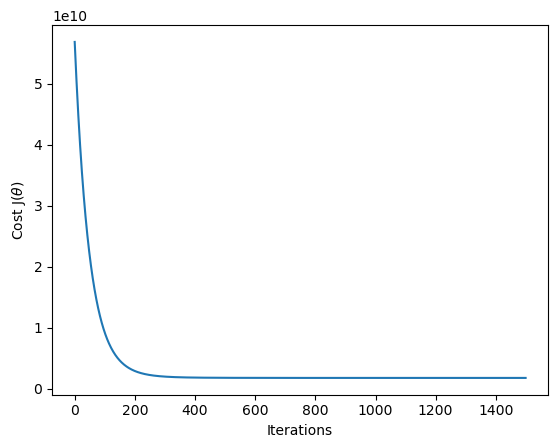

theta:  [319987.80923353 102807.85330238  -6110.57818936]


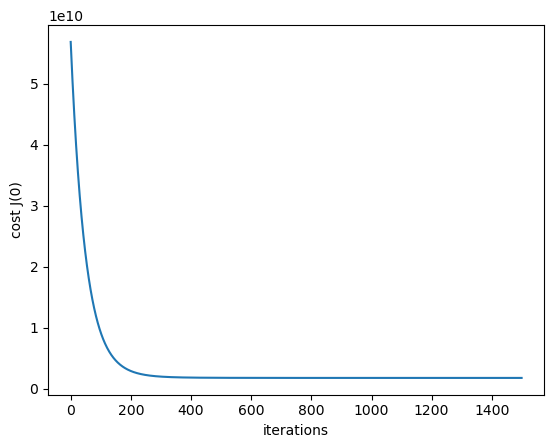

In [112]:
# Comenzamos con theta a ceros
theta = np.zeros(shape=[3, 1])

theta, J_history = gradient_descent(X_norm,y,theta, alpha=0.01,num_iters =1500)

print('theta: ', theta.ravel())

plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('iterations')
plt.ylabel('cost J(0)')
plt.show()

# <RELLENAR>

In [113]:
test_nb(list(np.round(theta, 2)), [319987.81, 102807.85,  -6110.58], 'Valores de theta incorrectos')

✔️ Test passed.


Dedica de nuevo un momento a analizar la importancia de cada una de las variables. ¿Cambia tu interpretación respecto a la realizada con la solución directa?
* ¿Cuál es la variable más relevante?
* ¿Cómo afecta cada variable al precio del piso?
* ¿Por qué han cambiado los thetas respecto a la solución directa? ¿Se te ocurre alguna forma de recuperar los valores anteriores? (no es necesario implementarla).

Responde aquí a las preguntas (doble click para editar):

* .El precio base que es de 319987$
* .el precio base se suma, cada metro cuadrado suma 102807$ y cada habitacion resta 6110$
* .Por que los valores antes no estaban normalizados, por lo que es probable que haya sufrido algunos sesgos.

##### Realizar predicciones

Vamos a utilizar los valores de $\theta$ obtenidos para realizar predicciones. En este caso debes predecir el valor de una casa de 200 metros cuadrados y 4 habitaciones. Ten en cuenta que el modelo ha sido entrenado con los datos normalizados, por lo que es necesario realizar la misma transformación a cualquier dato sobre el que queramos hacer predicciones. Para estandarizar nuevos datos (datos de test), se debe realizar el mismo proceso de normalización que en el entrenamiento, pero debemos utilizar las medias y desviaciones obtenidas sobre los datos de entrenamiento previamente. 

Para poder realizar esta normalización, define una función que estandarice datos de test. Aplica la misma fórmula que en el caso anterior, pero esta vez, en lugar de calcular las medias y desviaciones estándar, la función debe recibir esta información como parámetro de entrada y sólo devolver la matriz de datos normalizada. 

In [114]:
def standard_scaler_test(data, mean, std):

    # No normalizar la primera columna (unos)
    for i in range(0, data.shape[1]):
        data[:, i] = (data[:, i] - mean[i]) / std[i]
        
    return data

Con los datos normalizados, podemos realizar predicciones. Guarda el valor que predice el modelo aprendido para una casa de 200 metros cuadrados y 4 habitaciones en una variable llamada `house_pred`.

In [115]:
# Predecir el precio en euros para una casa de 200 m2 y 4 habitaciones
data = np.atleast_2d([1., 200., 4.]).astype(float) #(1,3)
unos = np.ones((data.shape[0], 1))

data_norm = standard_scaler_test(data[:,1:], mean, std)
data_aux = np.column_stack((unos, data_norm))  # (1,3)

house_pred = (data_aux @ theta)
print(house_pred)

[[333144.57202128]]


In [116]:
test_nb(np.round(house_pred, 5), 333144.57202, 'Valor de predicción incorrecto')

✔️ Test passed.


##### Comparación entre entrenamiento normalizando y sin normalizar

Ahora vamos a comprobar cómo influye el hecho de normalizar los datos para entrenar un algoritmo de regresión lineal mediante descenso por gradiente. 

Utiliza la función `gradient_descent`, partiendo de un vector de $\theta$ inicializado a 0s, para los datos sin normalizar. Es decir, utilizando `X` en lugar de `X_norm`. 

In [118]:
# <RELLENAR>
theta_aux = np.zeros((X.shape[1],1))

theta, costs = gradient_descent(X,y,theta_aux)

print('theta: ', theta.ravel())

# Muestra la gráfica con la evolución del coste J obtenido de la salida de gradient_descent
# <RELLENAR>
print('Final cost: ', costs[-1])

theta:  [nan nan nan]
Final cost:  nan


/var/folders/x1/zlr91hyj1kb9jx7yvlg1rcn80000gn/T/ipykernel_78520/4158367380.py:6: RuntimeWarning: overflow encountered in square
  J = (1/(2*m))*np.sum(error**2)
/var/folders/x1/zlr91hyj1kb9jx7yvlg1rcn80000gn/T/ipykernel_78520/594392126.py:7: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha*gradiente


¿Qué ocurre con los valores de $\theta$ obtenidos? ¿y con el coste?



* RESPONDER AQUÍ A LA PREGUNTA

Los valores no llegan a converger y sucede una explosion de gradiente ya que los valores son demasiado altos y no se llegan a soportar

¿Qué error puedes alcanzar modificando el hiper-parámetro correspondiente para conseguir que el algoritmo converja?

theta:  [ 141.45369488 1668.71741051  257.55878218]
Final cost:  2113512364.0785275


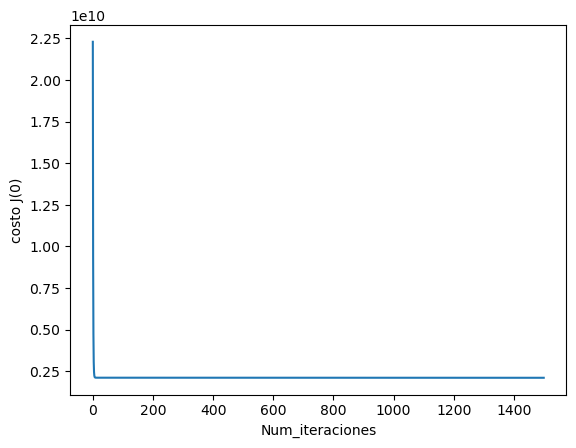

In [122]:
# Comenzamos con theta a 0's y utilizamos la función anterior para optimizar sus valores para obtener el nuevo theta y el historial de J

theta_aux = np.zeros((X.shape[1],1))

theta, costs = gradient_descent(X,y,theta_aux, alpha=0.00001, num_iters=1500)

print('theta: ', theta.ravel())

# Muestra la gráfica con la evolución del coste J obtenido de la salida de gradient_descent
# <RELLENAR>
print('Final cost: ', costs[-1])

plt.figure()
plt.plot(np.arange(costs.size),costs)
plt.xlabel('Num_iteraciones')
plt.ylabel('costo J(0)')
plt.show()

Compara ahora el resultado con la normalización de los datos de entrada.

theta:  [319987.80923353 102807.85330238  -6110.57818936]


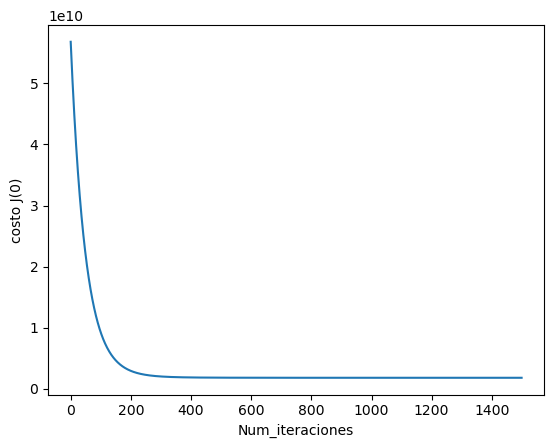

Final cost:  1805444602.4965813


In [125]:
# Comenzamos con theta a 0's y utilizamos la función anterior para optimizar sus valores para obtener el nuevo theta y el historial de J
theta_aux = np.zeros((X.shape[1],1))

theta, costs = gradient_descent(X_norm,y,theta_aux, alpha=0.01, num_iters=1500)
print('theta: ', theta.ravel())

# Muestra la gráfica con la evolución del coste J obtenido de la salida de gradient_descent
plt.figure()
plt.plot(np.arange(costs.size),costs)
plt.xlabel('Num_iteraciones')
plt.ylabel('costo J(0)')
plt.show()
print('Final cost: ', costs[-1])

### Scikit-learn <a id="parte2"></a>

Vamos ahora a seguir prácticando con la librería sklearn como ya hicimos en la práctica 2. Sigue el ejemplo de la práctica anterior para entrenar un modelo con los datos que disponemos.

In [126]:
# se importa de la libreria scikit-learn de python (sklearn) el paquete correspondiente a la regresión lineal
from sklearn.linear_model import LinearRegression

# Inicializa el modelo llamando al constructor de la regresión lineal
# Asigna todos sus parámetros a sus valores por defecto
regr = LinearRegression()
# Entrena el modelo (aprendizaje) utilizando la variable de entrada normalizada, sin los unos, y la variable de salida (y)
regr.fit(X_norm[:,1:], y.ravel())

LinearRegression()

Utiliza este modelo para predecir el valor de una casa de 100.3 metros cuadrados y 3 habitaciones. Recuerda que tendrás que estandarizar este dato para poder utilizar un modelo que ha sido entrenado con los datos estandarizados. 

Utiliza la función `predict` para predecir el valor de esta casa y almacena el resultado en una variable llamada `house_price`.

Primero realiza la predicción utiliza el modelo aprendido con scikit-learn (función `predict`). Después, realiza la misma tarea para las `thetas` que hemos obtenido mediante nuestra implementación (guárdalo en `house_price_2`). ¿Son iguales?

In [127]:
# Obtén la predicción para una casa de 100.3 metros cuadrados y 3 habitaciones
data = np.array([100.3, 3]).reshape(1, -1)
data = (data - mean)/std
# Utiliza la función predict para obtener el valor predicho por la regresión de scikit-learn (guardar en variable house_price)
house_price = regr.predict(data)
print(house_price)

# Utiliza la variable theta para obtener el valor predicho por la regresión obtenida por el descenso por gradiente
# Recuerda añadir la columna de 1s (guardar en variable house_price_2)
ones = np.ones((data.shape[0], 1))

data_mod = np.hstack((ones, data))

house_price_2 = (data_mod @ theta)[0]
print(house_price_2)

[200858.97517731]
[200927.97178067]


In [128]:
test_nb(np.round(house_price, 4), 200858.9752, 'Valor de la predicción de scikit-learn incorrecto')
test_nb(np.round(house_price_2, 4), 200927.9718, 'Valor de la predicción de nuestra implementación incorrecto')

✔️ Test passed.
✔️ Test passed.


¿Son iguales las predicciones? ¿Por qué? ¿Qué solución está utilizando scikit-learn? Comprueba tu respuesta experimentalmente.

*Escribe aquí tu respuesta* (doble click para editar)

In [129]:
# Comprueba tu respuesta experimentalmente
print("Datos: ", data_mod)
theta = reg_directa(X_norm, y)
directa = data_mod @ theta

theta = np.zeros(shape=[3,1])
theta, _ = gradient_descent(X_norm, y, theta, 0.01, 1500)
grad_desc_mio = data_mod @ theta

print("Regresion lineal por descenso por gradiente: ", grad_desc_mio)
print("Regresion lineal por solucion directa: ", directa)
print("Regresion lineal por scikit-learn: ", house_price)

Datos:  [[ 1.         -1.17151944 -0.22609337]]
Regresion lineal por descenso por gradiente:  [[200927.97178067]]
Regresion lineal por solucion directa:  [[200858.97517731]]
Regresion lineal por scikit-learn:  [200858.97517731]


### Visualización <a id="parte3"></a>
Ahora, como estamos trabajando con dos variables de entrada, vamos a tratar de visualizar el plano que ha estimado la regresión lineal para este problema.

Para ello seguiremos unos pasos similares a los utilizados en la práctica 2 para pintar la superficie.
1. Obtenemos los valores que queremos evaluar para cada variable.
2. Creamos un grid de valores con todos ellos.
3. A partir de los valores del grid crearemos una matriz de datos que será la que debemos estandarizar antes de utilizar el modelo para predecir la salida.
4. Utilizaremos la visualización en 3D: `scatter` para mostrar los puntos y `plot_surface` para mostrar el plano.

En definitiva, debes replicar esta figura (a la izquierda el plano obtenido con scikit-learn y a la derecha el plano obtenido por nuestro descenso por gradiente):


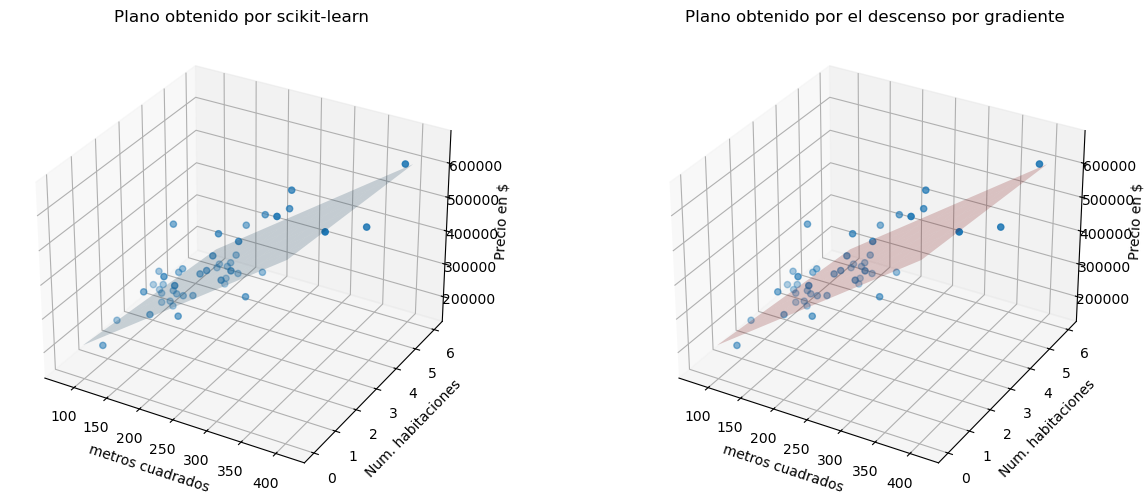

In [167]:
B0 = np.linspace(100,400, 10)
B1 = np.linspace(0,6,7)
xx,yy = np.meshgrid(B0,B1)



X_test = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))
X_test.shape


(70, 2)

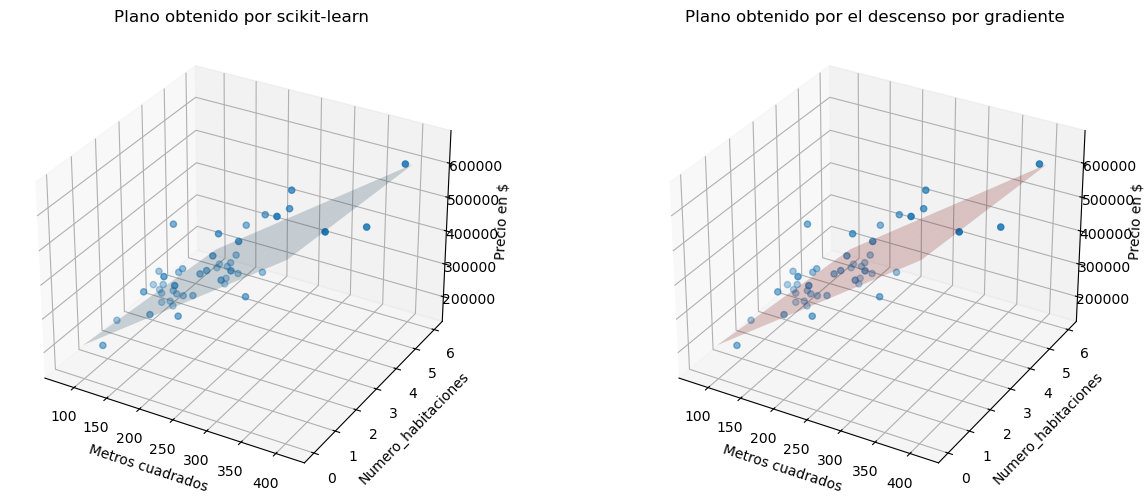

In [168]:
# Crea 10 puntos para la primera dimensión (B0) entre 100 y 400 (rango de la variable metros cuadrados)
B0 = np.linspace(100,400, 10)

# Crea 7 puntos para la segunda dimensión (B1) entre 0 y 6 (rango de la variable número de habitaciones)
B1 = np.linspace(0,6,7)

# Crea todas las combinaciones de los puntos creados anteriormente usando meshgrid (guardar en xx, yy)
xx,yy = np.meshgrid(B0,B1)

# Crea una matriz X_test que contenga todos los valores de xx en la primera columna y los de yy en la segunda
# Utiliza la función hstack. Para para ello previamente tendras que darles la forma correspondiente a xx e yy (reshape(-1, 1))
X_test = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))

# Normaliza la matriz obtenida usando la función standard_scaler_test, ten en cuenta que puede trabajar con matrices directamente
norm_data = standard_scaler_test(X_test,mean,std)

# Utiliza predict para obtener los valores de Z (el plano) - luego hacemos un reshape (al shape de xx) para poder pintarlo
Z = regr.predict(norm_data)


# Utiliza los valores de theta para obtener la salida del modelo aprendido mediante el descenso por gradiente
# Recuerda en este caso añadir la columna de 1s. Almacena el resultado en Z2 y luego haz el reshape correspondiente
norm_data_ones = np.hstack((np.ones(shape=[norm_data.shape[0], 1]), norm_data))
theta = np.zeros(shape=[3,1])
theta, J_history = gradient_descent(X_norm, y, theta)
Z2 = norm_data_ones @ theta

# Pintamos las dos gráficas
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Utiliza scatter para pintar los puntos y luego plot_surface para pintar el plano de scikit-learn
ax1.set_title('Plano obtenido por scikit-learn')
ax2.set_title('Plano obtenido por el descenso por gradiente')

ax1.plot_surface(xx,yy,Z.reshape(xx.shape[0], xx.shape[1]), alpha=0.2)
ax1.scatter(X[:,1],X[:,2],y)
# Utiliza scatter para pintar los puntos y luego plot_surface para pintar el plano de nuestro descenso por gradiente

ax2.plot_surface(xx,yy,Z2.reshape(xx.shape[0], xx.shape[1]),alpha=0.2, color='red')
ax2.scatter(X[:,1],X[:,2],y)

# Pon a las dos figuras las etiquetas de cada dimensión (set_xlabel...)
for ax in fig.axes:
    ax.set_xlabel('Metros cuadrados')
    ax.set_ylabel('Numero_habitaciones')
    ax.set_zlabel('Precio en $')



### Características polinomiales <a id="parte4"></a>

En teoría hemos visto que hay veces que a pesar de tener un problema de regresión lineal con una única variable, nos podemos encontrar con distribuciones de datos que no pueden ajustarse eficazmente mediante una simple recta. En estas situaciones, una estrategia efectiva es utilizar características polinomiales. Agregar características polinomiales implica esencialmente transformar nuestro problema de regresión lineal con una única variable en una regresión multivariable. 

Cuando introducimos características polinomiales, estamos expandiendo nuestro conjunto de variables. Por ejemplo, si comenzamos con una única variable $x$, al agregar características polinomiales de segundo grado, incluimos una nueva variable $x^2$. Esto significa que nuestro nuevo conjunto de variables incluirá $x$ y $x^2$, y nuestro modelo de regresión lineal considerará ambas variables. Al hacerlo, permitimos que el modelo se ajuste a curvas más complejas en los datos.

En esta parte de la práctica, vamos a abordar un problema de regresión añadiendo características polinomiales.  

El nuevo problema consiste en predecir la nota final (sobre 100) que obtendrá un estudiante de la asignatura "Aprendizaje Automático" en base al número de horas dedicadas a su estudio.

En el fichero 'notas.txt' están guardadas las horas de dedicación de 200 estudiantes (columna 1), junto con sus correspondientes notas finales (columna 2).

In [175]:
# Utilizamos la función loadtxt de numpy para cargar los datos en la variable data
data = np.loadtxt('notas.txt', delimiter=',')
print(data[:5, :])

# Creamos la matriz de entrada X y la de salida y
X = data[:, :-1]#todas las columnas antes de la ultima
y = data[:, -1]


[[ 30.    4.2]
 [278.   86.1]
 [249.   87.7]
 [ 57.    4.5]
 [312.   91. ]]


Representamos gráficamente los datos leidos (`scatter`).

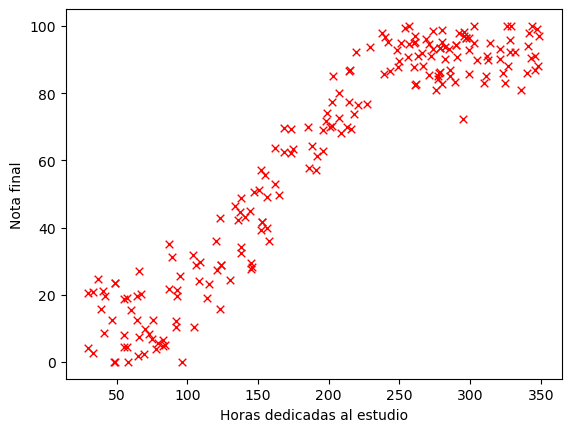

In [176]:
# Representación de la la nube de puntos en el plano (scatter)
plt.scatter(X, y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Horas dedicadas al estudio')
plt.ylabel('Nota final');

Como se puede observar, una recta no nos aporta la flexibilidad suficiente para obtener un buen ajuste a los datos. 

Vamos a utilizar la clase de scikit-learn [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) a la que simplemente debemos indicarle qué grado de polinomio queremos generar. En este caso, como tenemos solo una variable de entrada, el número de variables resultantes vendrá dado por este número.



In [177]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5, include_bias=False) # si ponemos include_bias=True por defecto, nos añade la columna de 1s
X_pol = poly.fit_transform(X)
X_pol.shape

(200, 5)

Ya hemos añadido características polinomiales de orden 5 a nuestros datos de entrada.

Utiliza ahora las funciones de scikit-learn para aprender un modelo con el conjunto de datos `X_pol` y representa gráficamente el resultado.

Debes replicar esta figura:

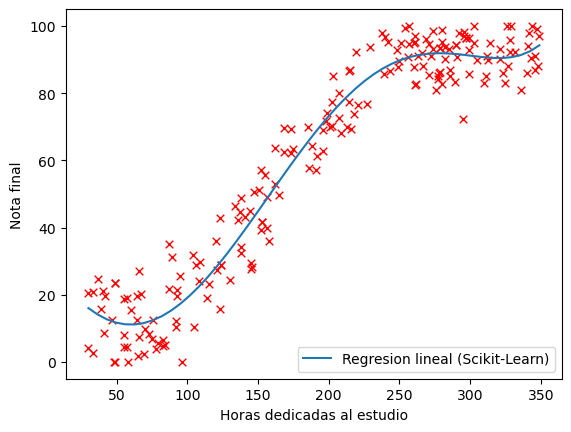

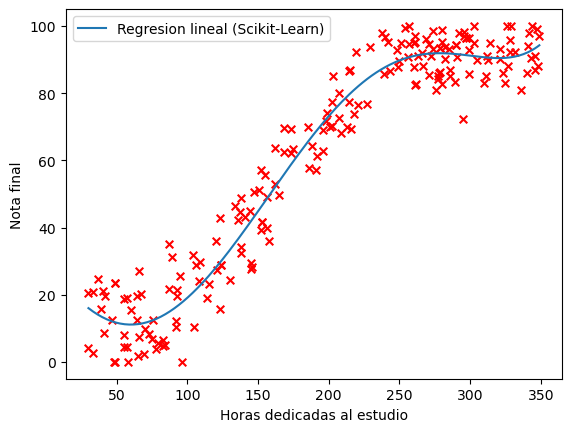

In [195]:
from sklearn.linear_model import LinearRegression

# Entrena un modelo de scikit-learn con X_poly
model = LinearRegression() #construimos un objeto
model.fit(X_pol, y.ravel())

# Crea las variable xx en el rango de horas mínimas y máximas del conjunto de datos
xx = np.linspace(min(X),max(X), X[:,0].size) #(200,1)

# Para generar la variable yy: esta debe ser el resultado de hacer la predicción sobre los datos xx
# Previamente ha habido que transformar xx de la misma forma que hemos hecho para conseguir X_pol
# Es decir: hay que añadir características polinomiales hasta grado 5 y guardarlo en xx_pol
# Para hacer esto, ya no debes usar `poly.fit_transform` sino solo `poly.transform` 
xx_pol = poly.transform(xx) #(200,5)

# Genera la variable yy como la predicción del modelo entrenado sobre xx_pol
yy = model.predict(xx_pol)

# Crea la gráfica con xx e yy como en la práctica anterior
fig, axes = plt.subplots(1,1)

axes.plot(xx,yy,label='Regresion lineal (Scikit-Learn)')
axes.scatter(X, y, s=30,c='r',marker='x')
axes.set_xlabel('Horas dedicadas al estudio')
axes.set_ylabel('Nota final')
axes.legend()

### Parte opcional <a id="parte5"></a>

Los ejercicios anteriores permiten, si se completan perfectamente, alcanzar un 9 sobre 10 en esta práctica. Esta última parte se valora 1 punto, permitiendo alcanzar el 10.

Ahora vamos a afrontar el mismo problema de predecir el valor de viviendas, pero teniendo en cuenta más información. Los datos provienen del [Boston Housing Dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Te recomendamos leer la información del enlace para comprender mejor el problema. 

Los datos datos que se encuentran en el fichero `"boston.txt"`, donde la información de las 12 primeras columnas corresponde a 12 variables para realizar la regresión y la última columna es el precio de cada bloque de viviendas (expresado en miles de dólares). 
Concretamente, las 12 variables son:

        - CRIM     ratio de crímenes per capita
        - ZN       proporción de área residencial para viviendas de más de 25000 metros cuadrados
        - INDUS    proporción de áreas de negocios de venta no minorista por municipio
        - CHAS     variable categórica del río Charles (= 1 si vivienda limita con el río; 0 en otro caso)
        - NOX      concentración de óxidos nítricos (partes por cada 10 millones)
        - RM       número de habitaciones
        - AGE      proporción de casas habitadas que fueron construidas antes del 1940
        - DIS      distancia ponderada a 5 centros de empleo de Boston
        - RAD      índice de accesibilidad a las variantes de Boston
        - TAX      impuesto catastral por cada 10000 dólares
        - PTRATIO  ratio de estudiantes/profesor por municipio
        - LSTAT    porcentaje de población con poco nivel adquisitivo
       
Con esta información, se trata de entrenar un modelo de regresión lineal con 12 variables y responder a las siguientes preguntas:
1. ¿Cuál es el error si se realiza el aprendizaje sin normalización? ¿y con normalización? ¿Ocurre lo mismo con scikit que con nuestra implementación? ¿Qué se te ocurre para hacer que funcione sin aplicar la normalización?
2. ¿Cuál es la variable más relevante para realizar la regresión? ¿Por qué?

In [236]:
def compute_cost_scikit(X, y, theta_regr):
    m = y.size
    
    h = theta_regr.predict(X)
    error = h - y
    J = (1/(2*m))*np.sum(error**2)

    return J

In [241]:
data_boston = np.loadtxt('boston.txt', delimiter=',') #(506,13)

X = data_boston[:,:-1] #(506,12)
y = data_boston[:,-1].reshape(-1,1) #(506,1)

X_unos = np.column_stack((np.ones(shape=[X.shape[0],1]),X))

#PASO ADICIONAL
#podriamos representar las funciones para ver como estan agrupadas algunas de ellas, vamos hacer con algunas que por logica puedan tener cierta relevancia lineal importante
#fig,axes = plt.subplots(1,2,figsize=(10,5))

#axes[0].scatter(X[:,11],y, s=30,c='r',marker='x')
#axes[0].set_xlabel('ratio de crimenes per capita')
#axes[0].set_ylabel('Precio de cada bloques de viviendas')
#axes[1].scatter(X[:,5],y, s=30,c='r',marker='x')
#axes[1].set_xlabel('Numero de habitaciones')
#axes[1].set_ylabel('Precio de cada bloques de viviendas')

#plt.show()

#Sin normalizacion
theta = np.zeros(shape=[X_unos.shape[1],1])
theta, J_history = gradient_descent(X_unos,y,theta, alpha=0.00001)
print(f"Coste sin normalizacion {J_history[-1]}")

#Con Normalizacion
X_norm,_,_ = standard_scaler(X)
X_unos_norm = np.column_stack((np.ones(shape=[X.shape[0],1]),X_norm))

theta = np.zeros(shape=[X_unos_norm.shape[1],1])
theta, J_history = gradient_descent(X_unos_norm,y,theta)
print(f"Coste con normalizacion {J_history[-1]}")

#Implementacion con Scikit-Learn sin normalizar
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
J_history_scikit = compute_cost_scikit(X,y,model)
print(f"Coste con scikit sin normalizacion es {J_history_scikit}")

#Con Normalizacion
regr = LinearRegression()
regr.fit(X_norm, y)
cost = compute_cost_scikit(X_norm, y, regr)

print("Coste con scikit con normalizacion es: ", cost)






Coste sin normalizacion 67680322991.76955
Coste con normalizacion 11.273605542754611
Coste con scikit sin normalizacion es 11.214840719744963
Coste con scikit con normalizacion es:  11.214840719744963


In [249]:
# <RELLENAR>
columnas = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT"]
indice_relevante = np.argmax(abs(theta[1:]))
print("la variable mas relevante para el precio de una vivienda es: ",columnas[indice_relevante])

la variable mas relevante para el precio de una vivienda es:  LSTAT


##### Respuesta a las preguntas
**Haz doble click en esta celda para introducir tu respuesta a las preguntas**


Primera [pregunta]:

*     Coste sin normalizacion 67680322991.76955
*     Coste con normalizacion 11.273605542754611
*     Coste con scikit sin normalizacion es 11.214840719744963
*     Coste con scikit con normalizacion es:  11.214840719744963

Segunda[pregunta]:
*     La variable mas relevante para el precio de una vivienda es: LSTAT, osea el porcentaje de poblacion con poco nivel adquisitivo